see https://www.youtube.com/watch?v=arydWPLDnEc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('google/GOOG_040819 - 200416.csv', date_parser=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 7 columns):
Date         3941 non-null object
Open         3941 non-null float64
High         3941 non-null float64
Low          3941 non-null float64
Close        3941 non-null float64
Adj Close    3941 non-null float64
Volume       3941 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 215.6+ KB


In [7]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3936,2020-04-08,1206.500000,1219.069946,1188.160034,1210.280029,1210.280029,1975100
3937,2020-04-09,1224.079956,1225.569946,1196.734985,1211.449951,1211.449951,2175400
3938,2020-04-13,1209.180054,1220.510010,1187.598022,1217.560059,1217.560059,1739800
3939,2020-04-14,1245.089966,1282.069946,1236.930054,1269.229980,1269.229980,2470400
3940,2020-04-15,1245.609985,1280.459961,1240.400024,1262.469971,1262.469971,1669900


In [8]:
data_training = data[data['Date'] < '2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [9]:
data_test = data[data['Date'] >= '2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3936,2020-04-08,1206.500000,1219.069946,1188.160034,1210.280029,1210.280029,1975100
3937,2020-04-09,1224.079956,1225.569946,1196.734985,1211.449951,1211.449951,2175400
3938,2020-04-13,1209.180054,1220.510010,1187.598022,1217.560059,1217.560059,1739800
3939,2020-04-14,1245.089966,1282.069946,1236.930054,1269.229980,1269.229980,2470400


In [12]:
training_data = data_training.drop(['Date', 'Adj Close'], axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [13]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [15]:
X_train = []
y_train = []

3617

In [22]:
training_data[4]

array([0.00235286, 0.00254929, 0.00328434, 0.00244874, 0.11176297])

In [23]:
for i in range (60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [24]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
X_train.shape, y_train.shape

((3557, 60, 5), (3557,))

#### Building LSTM

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [76]:
regressor = Sequential()

num_features = 5  # open, high, low, close, volume
# units            -> dimension of latent state vector of LSTM cell ~ capacity/#weights of LSTM cell
# return_sequences -> True so that all hidden states h_t (i.e. entire sequence) get passed to the next LSTM layer for it
#                     to process the entire sequence as well
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], num_of_features)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [77]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 60)            15840     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 60)            29040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 120)              

In [78]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [79]:
regressor.fit(X_train, y_train, epochs = 50, batch_size=32)

Train on 3557 samples
Epoch 1/50
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0134
Epoch 2/50
3557/3557 [==============================] - 22s 6ms/sample - loss: 0.0022
Epoch 3/50
3557/3557 [==============================] - 21s 6ms/sample - loss: 0.0019
Epoch 4/50
3557/3557 [==============================] - 22s 6ms/sample - loss: 0.0018
Epoch 5/50
3557/3557 [==============================] - 20s 6ms/sample - loss: 0.0019
Epoch 6/50
3557/3557 [==============================] - 25s 7ms/sample - loss: 0.0014
Epoch 7/50
3557/3557 [==============================] - 26s 7ms/sample - loss: 0.0017
Epoch 8/50
3557/3557 [==============================] - 22s 6ms/sample - loss: 0.0014
Epoch 9/50
3557/3557 [==============================] - 21s 6ms/sample - loss: 0.0013
Epoch 10/50
3557/3557 [==============================] - 22s 6ms/sample - loss: 0.00170s - loss: 0.
Epoch 11/50
3557/3557 [==============================] - 23s 6ms/sample - loss: 0.0013
Epoch 12/50
3557/

#### Prepare test dataset

In [80]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [81]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3560,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
3561,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
3562,2018-10-11,1072.939941,1106.400024,1068.270020,1079.319946,1079.319946,2949000
3563,2018-10-12,1108.000000,1115.000000,1086.401978,1110.079956,1110.079956,2101300
3564,2018-10-15,1108.910034,1113.446045,1089.000000,1092.250000,1092.250000,1372400
3565,2018-10-16,1104.589966,1124.219971,1102.500000,1121.280029,1121.280029,1928500
3566,2018-10-17,1126.459961,1128.989990,1102.189941,1115.689941,1115.689941,1467200


In [82]:
past_60_days = data_training.tail(60)

In [83]:
df = past_60_days.append(data_test, ignore_index=True)
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [84]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [0.94939388, 0.95636072, 0.94886695, 0.9583345 , 0.02098418],
       [0.97878991, 1.00668727, 0.98993525, 1.00073863, 0.02983633],
       [0.9792156 , 1.00537107, 0.99282396, 0.99519087, 0.02013725]])

In [85]:
X_test = []
y_test = []

In [86]:
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [87]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((324, 60, 5), (324,))

In [88]:
y_pred = regressor.predict(X_test)

In [89]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [90]:
scale = 1 / 8.18605127e-04
scale

1221.5901990069017

In [91]:
y_pred = y_pred * scale
y_test = y_test * scale

#### Visualization

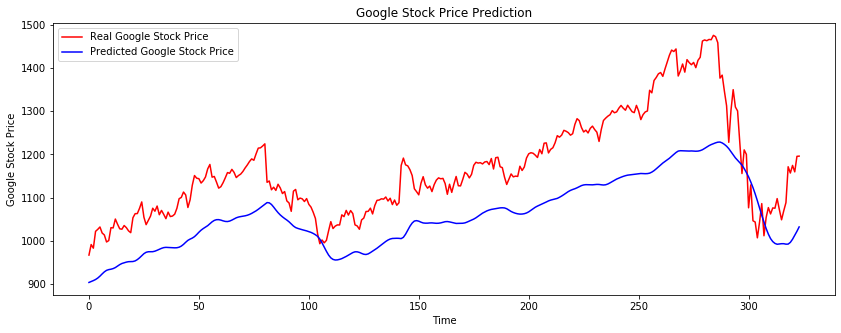

In [92]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()